# Исследование тарифов "Смарт" и "Ультра" оператора сотовой связи

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В  распоряжении данные 500 пользователей оператора сотовой связи: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучение данных из файла

Импорт необходимых для анализа библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
import warnings
warnings.filterwarnings('ignore')

In [2]:
calls = pd.read_csv('C:/Users/Nshan/Desktop/Проект_оператора_состовой_связи/data/calls.csv')
internet = pd.read_csv('C:/Users/Nshan/Desktop/Проект_оператора_состовой_связи/data/internet.csv')
messages = pd.read_csv('C:/Users/Nshan/Desktop/Проект_оператора_состовой_связи/data/messages.csv')
tariffs = pd.read_csv('C:/Users/Nshan/Desktop/Проект_оператора_состовой_связи/data/tariffs.csv')
users = pd.read_csv('C:/Users/Nshan/Desktop/Проект_оператора_состовой_связи/data/users.csv')

In [3]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Необходимо изменение типа данных колонки call_date на тип datetime в таблице calls. Пропусков в ходе предварительного просмотра обнаружено не было. Поскольку плата взимается за округлённое количество минут, необходимо будет добавить колонку с данным показателем. Значения в стобце продолжительности звонков выглядят правдиво.

In [6]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Имеет смысл удалить колонку Unnamed: 0, так как она полностью иммитирует индексы таблицы internet. Поскольку плата идёт за округлённое в большую сторону количество гигабайт, то необходимо будет добавить столбец с гегабайтами для платы. Значения в столбце с мегабайтами интерента выглядят правдиво, но нужно будет проверить, как много людей вообще не используют интернет (возможно это баг).

In [9]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице messages следует поменять тип данных колонки message_date на datetime и добавить нехватающие элементы в таблицу.

In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [15]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

В таблице users обнаружены пропуске в столбце с датой прекращения пользования тарифом. Значит тариф ещё действовал на момент выгрузки данных. Значения в столбце reg_date и churn_date следует преобразовать в datetime. Все данные таблицы возраста выглядят правдободоно.

### Вывод

1. Необходимо изменение типа данных колонки call_date на тип datetime в таблице calls. Пропусков в ходе предварительного просмотра обнаружено не было. Значения в стобце продолжительности звонков выглядят правдиво.
2. Имеет смысл удалить колонку Unnamed: 0, так как она полностью иммитирует индексы таблицы internet. Поскольку плата идёт за округлённое в большую сторону количество гигабайт, то необходимо будет добавить столбец с гегабайтами для платы. Значения в столбце с мегабайтами интерента выглядят правдиво, но нужно будет проверить, как много людей вообще не используют интернет (возможно это баг).
3. В таблице messages следует поменять тип данных колонки message_date на datetime и добавить нехватающие элементы в таблицу.
4. В таблице с тарифами всё оформлено правильно. Типы данных указаны верно.
5. В таблице users обнаружены пропуске в столбце с датой прекращения пользования тарифом. Значит тариф ещё действовал на момент выгрузки данных. Значения в столбце reg_date и churn_date следует преобразовать в datetime. Все данные таблицы возраста выглядят правдободоно.

## Предварительная обработка данных

### Приведение данных к нужным типам

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet = internet.drop('Unnamed: 0', 1)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [17]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [18]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Обработка пропусков и поиск ошибок в данных

In [19]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [20]:
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [21]:
internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [22]:
internet.isnull().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [23]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [24]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [25]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [26]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

**Выводы**

Пропуски в таблице пользователей в столбце churn_date обусловлены тем, что пользователи на момент выгрузки данных всё ещё пользуются тарифом.

### Обработка дубликатов

In [27]:
print(calls.duplicated().sum())
print(internet.duplicated().sum())
print(messages.duplicated().sum())
#users['city'] = users['city'].str.lower() приводим к нижнему регистру, чтобы с большей ворятностью отсечь дупликаты
#users['first_name'] = users['first_name'].str.lower()
#users['last_name'] = users['last_name'].str.lower()
print(users.duplicated().sum())

0
0
0
0


**Выводы**

1. Приводим к нижнему регистру значения столбцов с городом и ФИ, чтобы с большей ворятностью отсечь дупликаты. Лемматизацию применять нет смысла, так как отдельно ФИО может совпадать, а совпадение всех элементов таблицы проверены методом duplicated

### Добавление значений в таблицу

In [28]:
calls['month'] = calls['call_date'].dt.month

In [29]:
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
5,1000_5,2018-11-02,0.00,1000,11
6,1000_6,2018-10-18,0.00,1000,10
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9
9,1000_9,2018-08-15,0.00,1000,8


In [30]:
calls['duration_paid'] = np.ceil(calls['duration'])
calls['duration_paid'] = calls['duration_paid'].astype('int')
calls_count = calls.pivot_table(index=['user_id', 'month'], values='duration_paid', aggfunc=['count', 'sum'])
calls_count.columns = ['calls_count', 'calls_duration']
calls_count.head(20)

calls_count  calls_duration
user_id month                             
1000    5               22             159
        6               43             172
        7               47             340
        8               52             408
        9               58             466
        10              57             350
        11              43             338
        12              46             333
1001    11              59             430
        12              63             414
1002    6               15             117
        7               26             214
        8               42             289
        9               36             206
        10              33             212
        11              32             243
        12              33             236
1003    8               55             380
        9              134             961
        10             108             855

In [31]:
messages['month'] = messages['message_date'].dt.month
messages_count = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
messages_count.columns = ['messages_count']
messages_count.head(10)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11

In [32]:
def gb_paid(mb):
    gb = mb / 1024
    return np.ceil(gb)

In [33]:
internet['month'] = internet['session_date'].dt.month
internet_count = internet.pivot_table(index=['user_id', 'month'], values=['mb_used'], aggfunc=['sum'])
internet_count.columns = ['traffic_sum']
internet_count['traffic_gb'] = internet_count['traffic_sum'].apply(gb_paid)
internet_count['traffic_gb'] = internet_count['traffic_gb'].astype('int')
internet_count.head(20)

traffic_sum  traffic_gb
user_id month                         
1000    5          2253.49           3
        6         23233.77          23
        7         14003.64          14
        8         14055.93          14
        9         14568.91          15
        10        14702.49          15
        11        14756.47          15
        12         9817.61          10
1001    11        18429.34          18
        12        14036.66          14
1002    6         10856.82          11
        7         17580.10          18
        8         20319.26          20
        9         16691.08          17
        10        13888.25          14
        11        18587.28          19
        12        18113.73          18
1003    8          8565.21           9
        9         12468.87          13
        10        14768.14          15

In [34]:
#full_month = calls_count.join([messages_count, internet_count], how='outer')
full_month = calls_count.merge(messages_count, how='outer', on=['user_id', 'month'])
full_month = full_month.merge(internet_count, how='outer', on=['user_id', 'month'])
full_month = full_month.drop('traffic_sum', 1)
full_month = full_month.reset_index()
full_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls_count     3174 non-null   float64
 3   calls_duration  3174 non-null   float64
 4   messages_count  2717 non-null   float64
 5   traffic_gb      3203 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 150.8 KB


In [35]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [36]:
full_month = full_month.merge(users, on='user_id')
full_month = full_month.rename(columns={'tariff': 'tariff_name'})
full_month = full_month.merge(tariffs, on='tariff_name')
full_month.head(10)

,user_id,month,calls_count,calls_duration,messages_count,traffic_gb,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,57.0,350.0,73.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,43.0,338.0,58.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,46.0,333.0,70.0,10.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,1003,8,55.0,380.0,37.0,9.0,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
9,1003,9,134.0,961.0,91.0,13.0,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1


In [37]:
full_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   calls_count            3174 non-null   float64       
 3   calls_duration         3174 non-null   float64       
 4   messages_count         2717 non-null   float64       
 5   traffic_gb             3203 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff_name            3214 non-null   object        
 13  mes

In [38]:
def revenue(row):
        revenue = row['rub_monthly_fee']
        message = row['messages_count'] - row['messages_included']
        calls = row['calls_duration'] - row['minutes_included']
        gb = row['traffic_gb'] - row['mb_per_month_included'] / 1024
        if message > 0:
            revenue += message * row['rub_per_message']
        if calls > 0:
            revenue += calls * row['rub_per_minute']
        if gb > 0:
            revenue += gb * row['rub_per_gb']
        return revenue

In [39]:
full_month['revenue'] = full_month.apply(revenue, axis=1)

In [40]:
full_month.query('revenue > 1950').head()

,user_id,month,calls_count,calls_duration,messages_count,traffic_gb,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
50,1024,11,157.0,1146.0,NaN,43.0,73,NaT,Санкт-Петербург,Иулиан,...,2018-10-31,ultra,1000,30720,3000,1950,150,1,1,3900.0
51,1024,12,136.0,949.0,NaN,36.0,73,NaT,Санкт-Петербург,Иулиан,...,2018-10-31,ultra,1000,30720,3000,1950,150,1,1,2850.0
78,1050,7,35.0,209.0,52.0,35.0,44,2018-10-03,Тюмень,Рузана,...,2018-06-16,ultra,1000,30720,3000,1950,150,1,1,2700.0
97,1060,12,184.0,1233.0,52.0,43.0,46,NaT,Калуга,Яков,...,2018-11-24,ultra,1000,30720,3000,1950,150,1,1,3900.0
211,1124,10,152.0,1225.0,121.0,49.0,54,NaT,Махачкала,Альбин,...,2018-09-24,ultra,1000,30720,3000,1950,150,1,1,4800.0


### Выводы

1. Пропуски в таблице пользователей в столбце churn_date обусловлены тем, что пользователи на момент выгрузки данных всё ещё пользуются тарифом.
2. Приводим к нижнему регистру значения столбцов с городом и ФИ, чтобы с большей ворятностью отсечь дупликаты. Лемматизацию применять нет смысла, так как отдельно ФИО может совпадать, а совпадение всех элементов таблицы проверены методом duplicated
3. Создана сводная таблица, содержащая: по кадому коиенту помесячную информацию об использование их тарифного пакета и общий доход от использования тарифов и сверхтарифных минут, сообщений и гегабайт интернета.

## Анализ данных

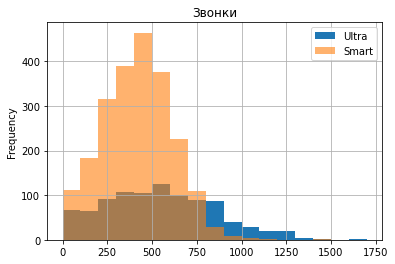

In [41]:
ox = (full_month
 .query('tariff_name == "ultra"')
 .plot(kind='hist', y='calls_duration', label='Ultra', grid=True, legend=True, title='Звонки', range=(0,1700), bins=17)
)

(full_month
 .query('tariff_name == "smart"')
 .plot(kind='hist', y='calls_duration', label='Smart', grid=True, legend=True, ax=ox, alpha=0.6, range=(0,1700), bins=17)
)
plt.show()

In [42]:
print(np.var(full_month.query('tariff_name == "ultra"')['calls_duration'], ddof=1))
print(np.std(full_month.query('tariff_name == "ultra"')['calls_duration'], ddof=1))

94203.41839614809
306.9257538821858


По тарифу ultra люди чаще всего говорят около 545 минут. Стандартное отколение по тарифу ультра более чем на 30% стандартного отклонения по тарифу смарт, что говорит о том, что абонементы по тарифу ультра имеет более широкий диапозон по ежемесячным минутам разговора, что объяснятеся доступностью минут для раговора по тарифу.

In [43]:
print(full_month.query('tariff_name == "smart"')['calls_duration'].mean())
print(full_month.query('tariff_name == "ultra"')['calls_duration'].mean())

419.0629779577148
545.4511041009464


In [44]:
print(np.var(full_month.query('tariff_name == "smart"')['calls_duration'], ddof=1))
print(np.std(full_month.query('tariff_name == "smart"')['calls_duration'], ddof=1))

35844.18955134385
189.32561778941553


In [45]:
full_month.pivot_table(
    index = ['tariff_name'], values = 'calls_duration', 
    aggfunc = ['var', 'std','mean'] 
    )

,var,std,mean
,calls_duration,calls_duration,calls_duration
tariff_name,,,
smart,35844.189551,189.325618,419.062978
ultra,94203.418396,306.925754,545.451104


По тарифу смарт люди чаще всего горят в районе 420 минут, что совпадает с лимитом по тарифу. Стандартное отклнение равно 189 минутам.

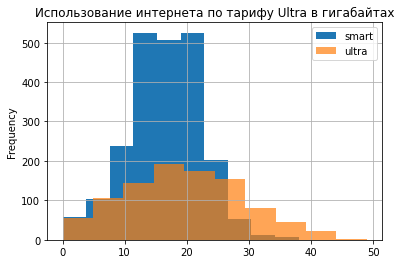

In [46]:
ox = (full_month
 .query('tariff_name == "smart"')
 .plot(kind='hist', y='traffic_gb', title='Использование интернета по тарифу Smart в гигабайтах', grid=True, legend=True, label='smart')
)
(full_month
 .query('tariff_name == "ultra"')
 .plot(kind='hist', y='traffic_gb', title='Использование интернета по тарифу Ultra в гигабайтах', grid=True, legend=True, ax=ox, alpha=0.7, label='ultra')
)
plt.show()

Чаще всего абоненты по тарифу smart в месяц на интернет тратят 12-21 гигабайта.

Чаще всего абоненты по тарифу ultra в месяц на интернет тратят 16-25 гигабайта.

In [47]:
print('В среднеме по тарифу smart на интренет тратится', full_month.query('tariff_name == "smart"')['traffic_gb'].mean(), 'гигабайт')
print('В среднеме по тарифу ultra на интренет тратится', full_month.query('tariff_name == "ultra"')['traffic_gb'].mean(), 'гигабайт')
print('Дисперсия по тарифу smart равна', np.var(full_month.query('tariff_name == "smart"')['traffic_gb'], ddof=1))
print('Стандартное отклонение по тарифу smart равно', np.std(full_month.query('tariff_name == "smart"')['traffic_gb'], ddof=1))
print('Дисперсия по тарифу ultra равна', np.var(full_month.query('tariff_name == "ultra"')['traffic_gb'], ddof=1))
print('Стандартное отклонение по тарифу ultra равно', np.std(full_month.query('tariff_name == "ultra"')['traffic_gb'], ddof=1))

В среднеме по тарифу smart на интренет тратится 16.33617594254937 гигабайт
В среднеме по тарифу ultra на интренет тратится 19.694358974358973 гигабайт
Дисперсия по тарифу smart равна 32.92375582354318
Стандартное отклонение по тарифу smart равно 5.737922605224227
Дисперсия по тарифу ultra равна 94.14673405991667
Стандартное отклонение по тарифу ultra равно 9.702923995369472


Картина по дисперсии и стандартному отклонению схожа с теми же показателями при сравнении трат минут.

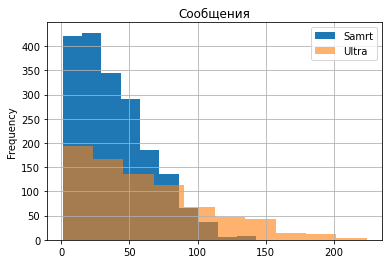

In [48]:
ax = (full_month
 .query('tariff_name == "smart"')
 .plot(kind='hist', y='messages_count', label='Samrt', grid=True, legend=True)
)
(full_month
 .query('tariff_name == "ultra"')
 .plot(kind='hist', y='messages_count', label='Ultra', grid=True, legend=True, alpha=0.6, ax=ax, title= 'Сообщения')
)
plt.show()

В целом 50 смс в неделю хватает большинству обонентов обоих тарифов. Стоит отметить, что абоненты тарифа ультра в среднем ежемясячно отправляют на 22 сообщения больше. 

In [49]:
print('В среднеме по тарифу smart абоненты отправляют', full_month.query('tariff_name == "smart"')['messages_count'].mean(), 'смс')
print('В среднеме по тарифу ultra абоненты отправляют', full_month.query('tariff_name == "ultra"')['messages_count'].mean(), 'смс')
print('Дисперсия по тарифу smart равна', np.var(full_month.query('tariff_name == "smart"')['messages_count'], ddof=1))
print('Стандартное отклонение по тарифу smart равно', np.std(full_month.query('tariff_name == "smart"')['messages_count'], ddof=1))
print('Дисперсия по тарифу ultra равна', np.var(full_month.query('tariff_name == "ultra"')['messages_count'], ddof=1))
print('Стандартное отклонение по тарифу ultra равно', np.std(full_month.query('tariff_name == "ultra"')['messages_count'], ddof=1))

В среднеме по тарифу smart абоненты отправляют 38.71644120707596 смс
В среднеме по тарифу ultra абоненты отправляют 61.161006289308176 смс
Дисперсия по тарифу smart равна 717.5942011753527
Стандартное отклонение по тарифу smart равно 26.787948804926305
Дисперсия по тарифу ultra равна 2109.6591828652035
Стандартное отклонение по тарифу ultra равно 45.931026364160466


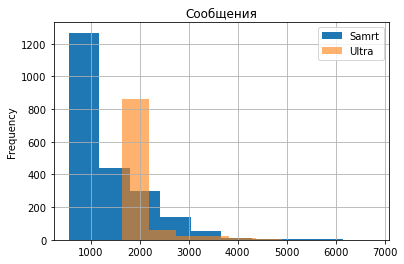

In [50]:
ax = (full_month
 .query('tariff_name == "smart"')
 .plot(kind='hist', y='revenue', label='Samrt', grid=True, legend=True)
)
(full_month
 .query('tariff_name == "ultra"')
 .plot(kind='hist', y='revenue', label='Ultra', grid=True, legend=True, alpha=0.6, ax=ax, title= 'Сообщения', range=(550, 6000), bins = 10)
)
plt.show()

Количество людей, выходящих за тарифный план среди пользователей тарифа smart больше чем среди ultra. 

### Выводы

1. По тарифу ultra люди чаще всего говорят около 545 минут. Стандартное отколение по тарифу ультра более чем на 30% стандартного отклонения по тарифу смарт, что говорит о том, что абонементы по тарифу ультра имеет более широкий диапозон по ежемесячным минутам разговора, что объяснятеся доступностью минут для раговора по тарифу.
2. По тарифу смарт люди чаще всего горят в районе 420 минут, что совпадает с лимитом по тарифу. Стандартное отклнение равно 189 минутам.
3. Чаще всего абоненты по тарифу smart в месяц на интернет тратят 12-21 гигабайта.
4. Картина по дисперсии и стандартному отклонению схожа с теми же показателями при сравнении трат минут.
5. В целом 50 смс в неделю хватает большинству обонентов обоих тарифов. Стоит отметить, что абоненты тарифа ультра в среднем ежемясячно отправляют на 22 сообщения больше. 
6. Нередки случаи, когда абонементы по тарифу smart превышают лимиты по тарифу. С абонентами ultra такое бывает редко.
7. Все гистограммы кроме гистограмм с сообщениями - распределены нормально.

## Проверка гипотез

Базовые гипотезы формируются исходя из равенства двух наблюдаемых событий. Альтернативная же гипотеза формируется исходя из обратной базовой гипотезы, поэтому получаем следующие две базовые гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;
2. средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Альтернативными будут являтся соотвествующие гипотезы: 
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны; 
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Критерием для проверки гипотез будет считаться равентсов средних двух  выборок, так как в таком случае можно будет говорить о равентсве двух выручек, ведь данные выборки распределены нормально. Уровень статистической значимости (alpha) = 5%.

### Базовая гипотеза 1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны

In [51]:
full_month.head(30)

,user_id,month,calls_count,calls_duration,messages_count,traffic_gb,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10,57.0,350.0,73.0,15.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11,43.0,338.0,58.0,15.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12,46.0,333.0,70.0,10.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1003,8,55.0,380.0,37.0,9.0,23,NaT,Москва,Белла,...,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950.0
9,1003,9,134.0,961.0,91.0,13.0,23,NaT,Москва,Белла,...,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,1950.0


In [52]:
print(full_month.query('tariff_name == "smart"')['tariff_name'].count())
print(full_month.query('tariff_name == "ultra"')['tariff_name'].count())
print(np.var(full_month.query('tariff_name == "smart"')['revenue']))
print(np.var(full_month.query('tariff_name == "ultra"')['revenue']))

2229
985
669485.2209234155
141373.07325620213


In [53]:
smart_rev = full_month.query('tariff_name == "smart"')['revenue']
ultra_rev = full_month.query('tariff_name == "ultra"')['revenue']

print('Средния доходность от тарифа smart', smart_rev.mean())
print('Средния доходность от тарифа ultra', ultra_rev.mean())
print('Медианная доходность от тарифа smart', smart_rev.median())
print('Медианная доходность от тарифа ultra', ultra_rev.median())

result = st.ttest_ind(smart_rev, ultra_rev, equal_var=False)

Средния доходность от тарифа smart 1289.9735307312696
Средния доходность от тарифа ultra 2070.1522842639592
Медианная доходность от тарифа smart 1023.0
Медианная доходность от тарифа ultra 1950.0


**С точки зрения доходности тарифов, тариф ultra приносит в среднем на 1000 рублей больше. Для рекламы компании следует сделать особый акцент на тарифе ultra**

In [54]:
alpha = 0.05
print('pvalue:', result.pvalue)
if result.pvalue > alpha:
    print('Базовая гипотеза о равенстве средней выручки тарифов smart и ultra не отвергается')
else:
    print('Базовая гипотеза отвергается. Средняя выручка пользователей тарифов smart и ultra не равны')

pvalue: 4.2606313931076085e-250
Базовая гипотеза отвергается. Средняя выручка пользователей тарифов smart и ultra не равны


In [55]:
result.pvalue

4.2606313931076085e-250

### Базовая гипотеза 2: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

In [56]:
print(full_month.query('city == "Москва"')['tariff_name'].count())
print(full_month.query('city != "Москва"')['tariff_name'].count())
print(np.var(full_month.query('city == "Москва"')['revenue']))
print(np.var(full_month.query('city != "Москва"')['revenue']))

611
2603
564710.7117467293
653886.3270894091


In [57]:
msc_rev = full_month.query('city == "Москва"')['revenue']
not_msc_rev = full_month.query('city != "Москва"')['revenue']
print('Средние доходы по Москве', msc_rev.mean())
print('Средние доходы по регионам', not_msc_rev.mean())
print('Медиана доходов по 2 тарифам в Москве', msc_rev.median())
print('Медиана доходов по 2 тарифам в регионах', not_msc_rev.median())

Средние доходы по Москве 1546.7135842880523
Средние доходы по регионам 1524.9362274298885
Медиана доходов по 2 тарифам в Москве 1750.0
Медиана доходов по 2 тарифам в регионах 1583.0


In [58]:
region_res = st.ttest_ind(msc_rev, not_msc_rev)

In [59]:
alpha = 0.05
print('pvalue:', region_res.pvalue)
if region_res.pvalue > alpha:
    print('Базовая гипотеза о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов не отвергается')
else:
    print('Базовая гипотеза отвергается. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.')

pvalue: 0.5440152911670224
Базовая гипотеза о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов не отвергается


### Выводы

Гипотеза 1. Поскольку выборки разных размеров, а их дисперсии отличаются в более чем 2 раза, то переменная equal_var принимает значение False. Для проверки первой гипотезы использовался метод ttest_ind, так как он сравнивает средние двух выборок. Решение о принятии или не принятии гипотезы исходит исходя из значения pvalue - уровень значимости этой стаситики (вероятность получить наблюдаемый результат), пороговое значение которой для данной выборки установлено alpha = 5%.

**Базовая гипотеза отвергается. Средняя выручка пользователей тарифов smart и ultra не равны**

Гипотеза 2. Поскольку дисперсии выборок почти одинаковы, есть основания предполагать, что выборки генеральных совокупностей могут иметь похожие значения, поэтому переменная equal_var принимает значение базовое True. Для проверки первой гипотезы использовался метод ttest_ind, так как он сравнивает средние двух выборок. Решение о принятии или не принятии гипотезы исходит исходя из значения pvalue - уровень значимости этой стаситики (вероятность получить наблюдаемый результат), пороговое значение которой для данной выборки установлено alpha = 5%.

**Базовая гипотеза о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов не отвергается**

- Средния доходность от тарифа smart 1046.251461988304
- Средния доходность от тарифа ultra 2070.9779179810726
- Медианная доходность от тарифа smart 850.0
- Медианная доходность от тарифа ultra 1950.0


- Средние доходы по Москве 1402.6459016393442
- Средние доходы по регионам 1341.5378315132605
- Медиана доходов по 2 тарифам в Москве 1450.0
- Медиана доходов по 2 тарифам в регионах 1276.0


**С точки зрения доходности тарифов, тариф ultra приносит в среднем на 1000 рублей больше. Для рекламы компании следует сделать особый акцент на тарифе ultra**


## Общие выводы

1. Пропуски в таблице пользователей в столбце churn_date обусловлены тем, что пользователи на момент выгрузки данных всё ещё пользуются тарифом.
2. Приводим к нижнему регистру значения столбцов с городом и ФИ, чтобы с большей ворятностью отсечь дупликаты. Лемматизацию применять нет смысла, так как отдельно ФИО может совпадать, а совпадение всех элементов таблицы проверены методом duplicated
3. Создана сводная таблица, содержащая: по кадому коиенту помесячную информацию об использование их тарифного пакета и общий доход от использования тарифов и сверхтарифных минут, сообщений и гегабайт интернета.
4. По тарифу ultra люди чаще всего говорят около 545 минут. Стандартное отколение по тарифу ультра более чем на 30% стандартного отклонения по тарифу смарт, что говорит о том, что абонементы по тарифу ультра имеет более широкий диапозон по ежемесячным минутам разговора, что объяснятеся доступностью минут для раговора по тарифу.
5. По тарифу смарт люди чаще всего горят в районе 420 минут, что совпадает с лимитом по тарифу. Стандартное отклнение равно 189 минутам.
6. Чаще всего абоненты по тарифу smart в месяц на интернет тратят 12-21 гигабайта.
7. Картина по дисперсии и стандартному отклонению схожа с теми же показателями при сравнении трат минут.
8. В целом 50 смс в неделю хватает большинству обонентов обоих тарифов. Стоит отметить, что абоненты тарифа ультра в среднем ежемясячно отправляют на 22 сообщения больше. 
9. Нередки случаи, когда абонементы по тарифу smart превышают лимиты по тарифу. С абонентами ultra такое бывает редко.
10. Все гистограммы кроме гистограмм с сообщениями - распределены нормально.

две базовые гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;
* средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Альтернативными будут явялтся соотвествующие гипотезы: 
* средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны; 
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Выводы по гипотезам:
1. Базовая гипотеза отвергается. Средняя выручка пользователей тарифов smart и ultra не равны.
2. Базовая гипотеза о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов не отвергается.

**С точки зрения доходности тарифов, тариф ultra приносит в среднем на 1000 рублей больше. Для формирования рекламного бюджета коммерческому департаменту следует сделать особый акцент на тарифе ultra.**